In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr

In [ ]:
sys.setrecursionlimit(10000)

# demand 3

In [ ]:
def RSRG(p, n, d1, d2):
    LIMIT = 10
    color_map = []
    rsrg_graph = nx.Graph()

    n1 = (n * d2) // (d1 + d2)
    n2 = (n * d1) // (d1 + d2)
    if n1 + n2 != n:
        return rsrg_graph, color_map

    rsrg_graph.add_nodes_from(list(range(1, n1+1)))
    rsrg_graph.add_nodes_from(list(range(n1+1, n+1)))

    for i in range(n):
        if i < n1:
            color_map.append('red')
        else:
            color_map.append('blue')


    ls = list(range(1, n1+1)) * d1 + list(range(n1+1, n1+n2+1)) * d2
    
    random.shuffle(ls)

    edges_added = set()

    limit = LIMIT

    while ls:
        if limit < 0:
            return RSRG(p, n, d1, d2)

        node1 = np.random.choice(ls)
        node2 = np.random.choice(ls)

        if(node1,node2) not in edges_added and (node2,node1) not in edges_added and node1 != node2:
            limit = LIMIT
            if random.uniform(0, 1) < p:
                rsrg_graph.add_edge(node1, node2)
                edges_added.add((node1, node2))

            ls.remove(node1)
            ls.remove(node2)
        else:
            limit -= 1
            
    return rsrg_graph, color_map


In [ ]:
p = 1
n = 50
d1 = 10
d2 = 15
rsrg_graph, color_map = RSRG(p, n, d1, d2)

nx.draw(rsrg_graph, node_color=color_map, with_labels=True)
plt.show()


In [2]:
sys.setrecursionlimit(10000)

# demand 3

In [5]:
def RSRG(p, n, d1, d2):
    LIMIT = 10
    color_map = []
    rsrg_graph = nx.Graph()

    n1 = (n * d2) // (d1 + d2)
    n2 = (n * d1) // (d1 + d2)
    if n1 + n2 != n:
        return rsrg_graph, color_map

    rsrg_graph.add_nodes_from(list(range(1, n1+1)))
    rsrg_graph.add_nodes_from(list(range(n1+1, n+1)))

    for i in range(n):
        if i < n1:
            color_map.append('red')
        else:
            color_map.append('blue')


    ls = list(range(1, n1+1)) * d1 + list(range(n1+1, n1+n2+1)) * d2
    
    random.shuffle(ls)

    edges_added = set()

    limit = LIMIT

    while ls:
        if limit < 0:
            return RSRG(p, n, d1, d2)

        node1 = np.random.choice(ls)
        node2 = np.random.choice(ls)

        if(node1,node2) not in edges_added and (node2,node1) not in edges_added and node1 != node2:
            limit = LIMIT
            if random.uniform(0, 1) < p:
                rsrg_graph.add_edge(node1, node2)
                edges_added.add((node1, node2))

            ls.remove(node1)
            ls.remove(node2)
        else:
            limit -= 1
            
    return rsrg_graph, color_map


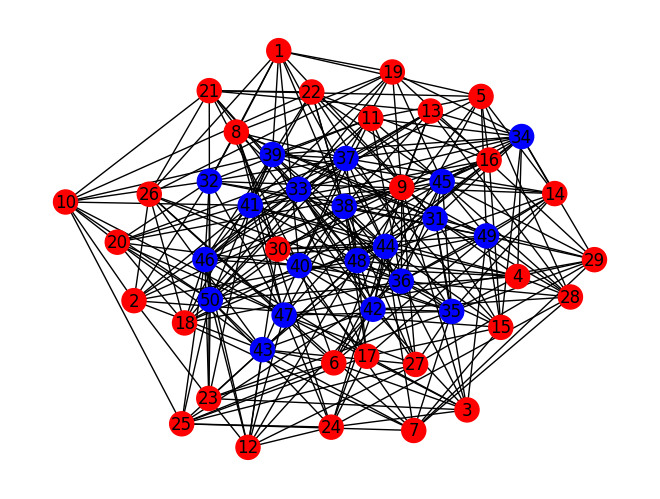

In [15]:
p = 1
n = 50
d1 = 10
d2 = 15
rsrg_graph, color_map = RSRG(p, n, d1, d2)

nx.draw(rsrg_graph, node_color=color_map, with_labels=True)
plt.show()
